In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 9.1 A Brief matplotlib API Primer

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

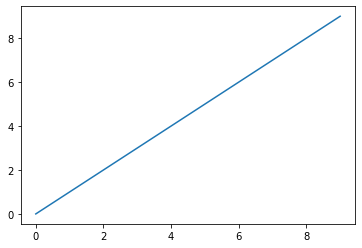

In [5]:
plt.plot(data)

While libraries like **seaborn** and **pandas’s built-in plotting functions** will deal with
many of the mundane details of making plots, should you wish to customize them
beyond the function options provided, you will need to learn a bit about the matplotlib API.

## Figures and Subplots

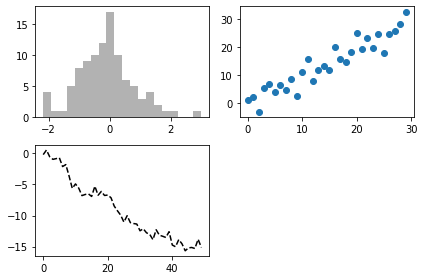

In [33]:
fig = plt.figure() #Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

plt.tight_layout()

Creating a figure with a grid of subplots is a very common task, so matplotlib
includes a convenience method, plt.subplots, that creates a new figure and returns
a NumPy array containing the created subplot objects

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCFDD73708>


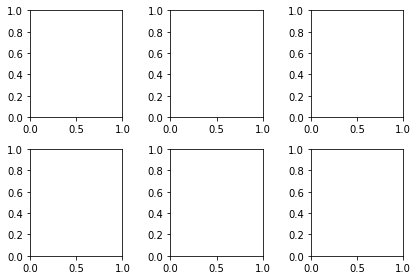

In [34]:
fig, axes = plt.subplots(2,3)

print(axes)

plt.tight_layout()

*See Table 9-1. pyplot.subplots options*

![pyplot.subplots options](Img/9.1.png)

### Adjusting the spacing around subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

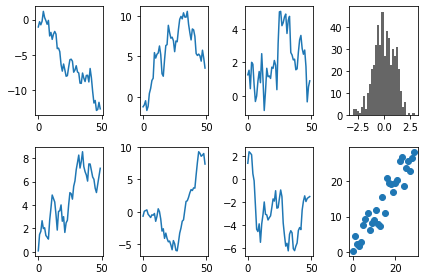

In [35]:
fig, axes = plt.subplots(2,4)

for i in range(2):
    for j in range(3):
        #axes[i,j].hist(np.random.randn(500), bins=30, color='k', alpha=0.6)
        axes[i, j].plot(np.random.randn(50).cumsum())
        
axes[0, 3].hist(np.random.randn(500), bins=30, color='k', alpha=0.6)
axes[1, 3].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

## Colors, Markers, and Line Styles

In [36]:
plt.plot?

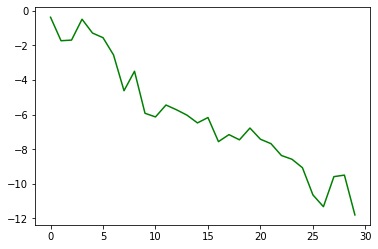

In [37]:
plt.plot(np.random.randn(30).cumsum(), 'g')

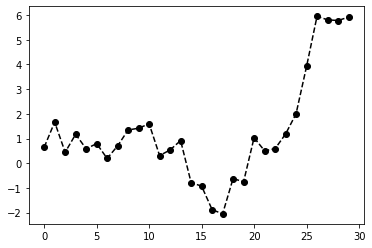

In [38]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

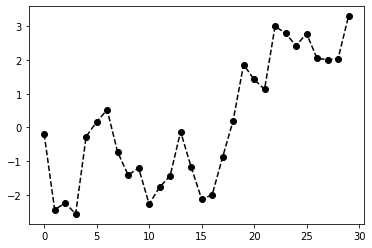

In [39]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

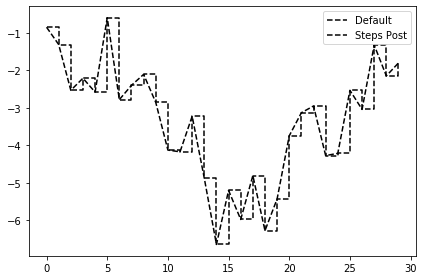

In [40]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='Steps Post')

plt.legend(loc='best')
plt.tight_layout()

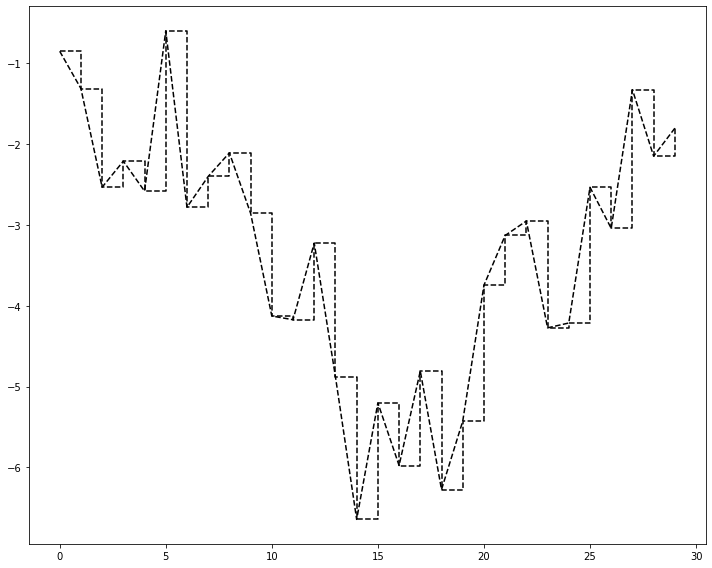

In [56]:
fig, axes = plt.subplots(figsize=(10,8))

axes.plot(data, 'k--', label='Default')
axes.plot(data, 'k--', drawstyle='steps-post', label='Steps Post')

ax.legend(loc='best')
plt.tight_layout()

## Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented
native matplotlib API.

### Setting the title, axis labels, ticks, and ticklabels

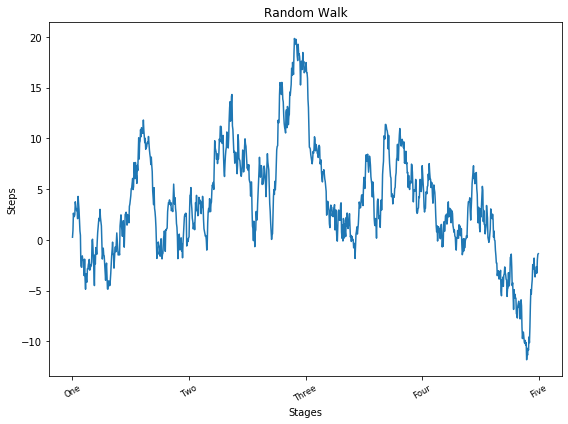

In [57]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #Set ticks for x-axis
labels = ax.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five'], rotation=30, fontsize='small')#Gives the label to x ticks

ax.set_title('Random Walk')
ax.set_xlabel('Stages')
ax.set_ylabel('Steps')

plt.tight_layout()

In [58]:
props = {'title':'Random Walk', 'xlabel':'Stages', 'ylabel':'Steps'}

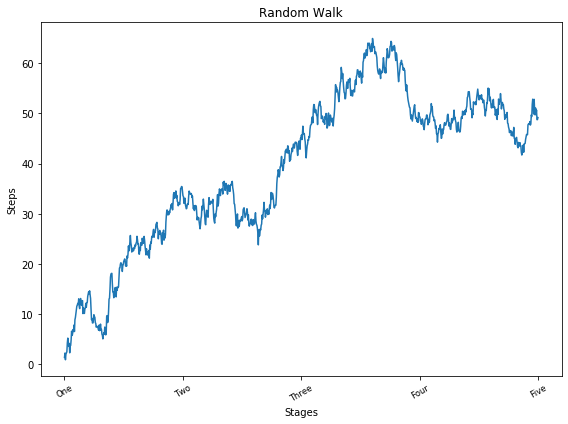

In [59]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #Set ticks for x-axis
labels = ax.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five'], rotation=30, fontsize='small')#Gives the label to x ticks

ax.set(**props)

plt.tight_layout()

### Adding legends

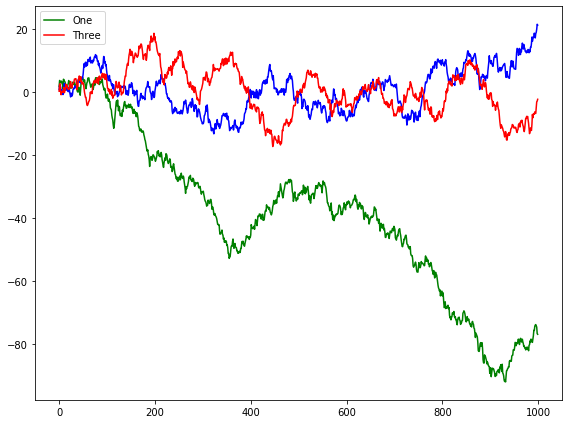

In [62]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum(), 'g', label='One')
ax.plot(np.random.randn(1000).cumsum(), 'b', label='_nolegend_') #Passing label='_nolegend_' will not add the label on legend
ax.plot(np.random.randn(1000).cumsum(), 'r', label='Three')

ax.legend(loc='best')
plt.tight_layout()

In [61]:
ax.legend? #For more information on legend

## Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

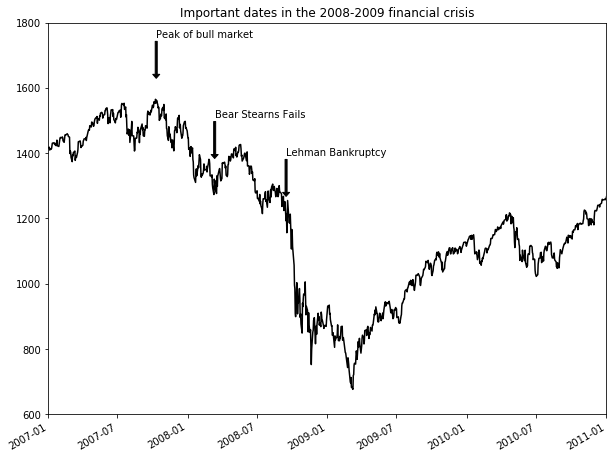

In [132]:
from datetime import datetime

fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(1,1,1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True) 
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'), (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=7, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    

    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

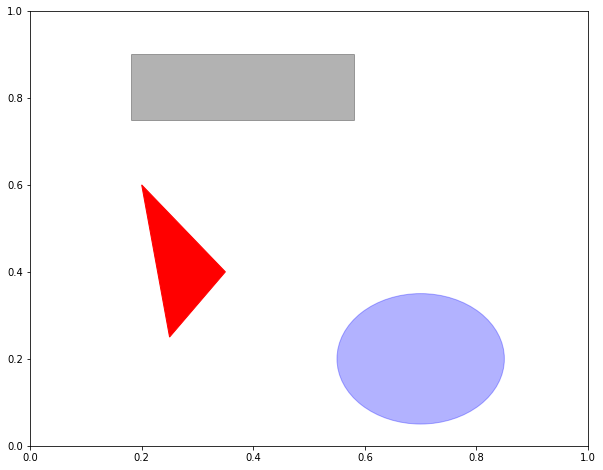

In [151]:
fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.18,0.75), 0.4, 0.15, color='k', alpha=0.3)
circl = plt.Circle((0.7,0.2), 0.15, color='b', alpha=0.3)
poly = plt.Polygon([[0.25, 0.25], [0.35, 0.4], [0.2, 0.6]], color='r')


ax.add_patch(rect)
ax.add_patch(circl)
ax.add_patch(poly)

## Saving Plots to File

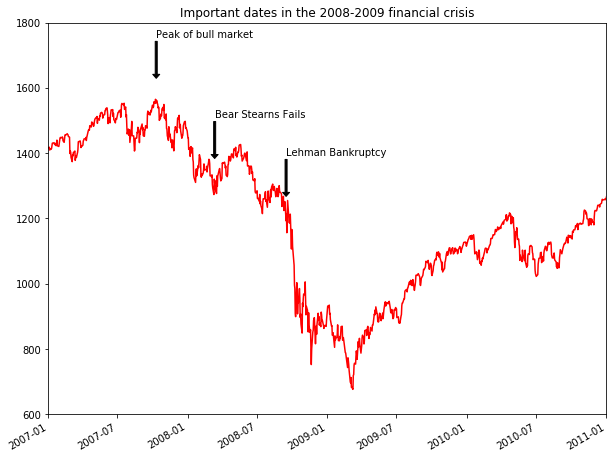

In [155]:
from datetime import datetime

fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(1,1,1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True) 
spx = data['SPX']

spx.plot(ax=ax, style='r-')

crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'), (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=7, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    

    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

plt.savefig('Important_dates_in_the_2008-2009-financial_crisis.png', dpi=400, bbox_inches='tight')

*See Table 9-2 for a list of some other options for savefig*

![list of some other options for savefig](Img/9.2.png)

## matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the
configuration programmatically from Python is to use the rc method

# 9.2 Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. You assemble a plot from its base components. Another library is seaborn, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization
types.

## Line Plot

In [166]:
data = np.random.randn(10).cumsum()
ser = pd.Series(data, index=np.arange(0,100,10))

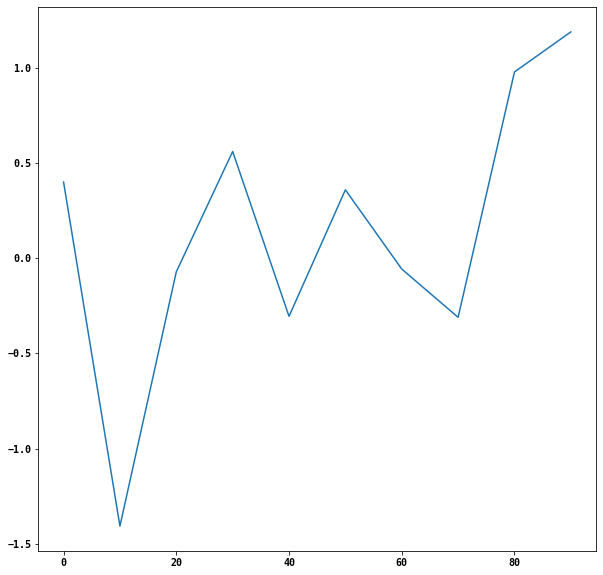

In [167]:
ser.plot()

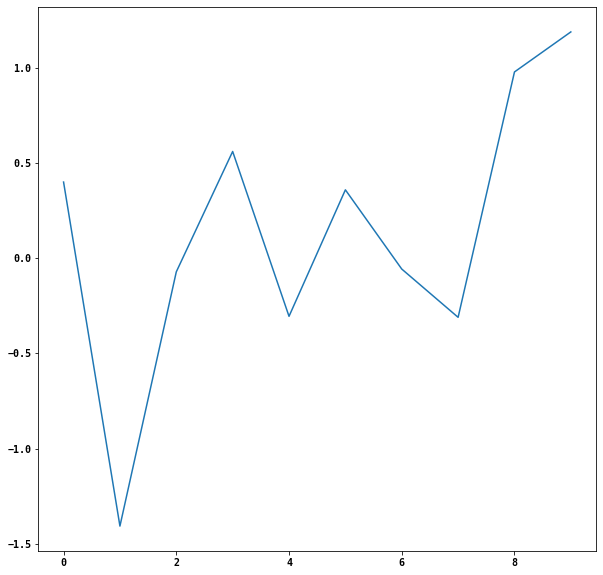

In [170]:
ser.plot(use_index=False)

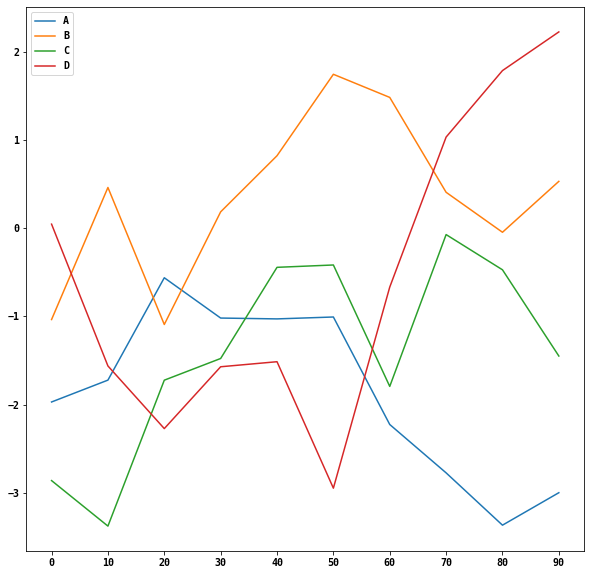

In [176]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0,100,10))
df.plot(xticks=np.arange(0,100,10))

*See Table 9-3 for a full listing of plot options*

![full listing of plot options](Img/9.3.png)

*See Table 9-4. DataFrame-specific plot arguments*

![DataFrame-specific plot arguments](Img/9.4.png)

## Bar Plots

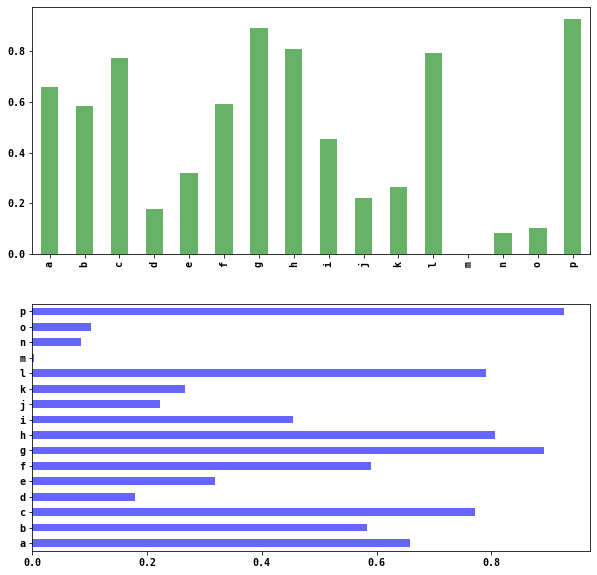

In [183]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='g', alpha=0.6)
data.plot.barh(ax=axes[1], color='b', alpha=0.6)

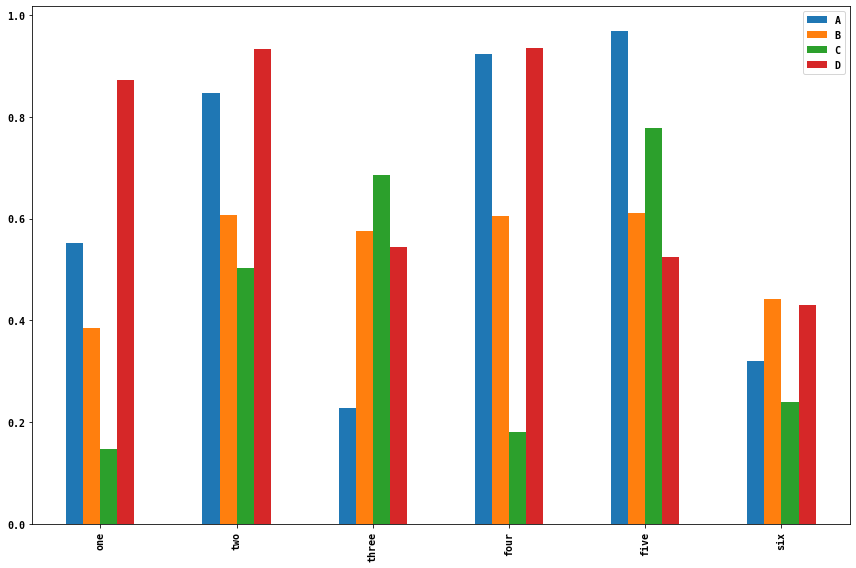

In [201]:
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar(figsize=(12,8))

plt.legend(loc='best')
plt.tight_layout()

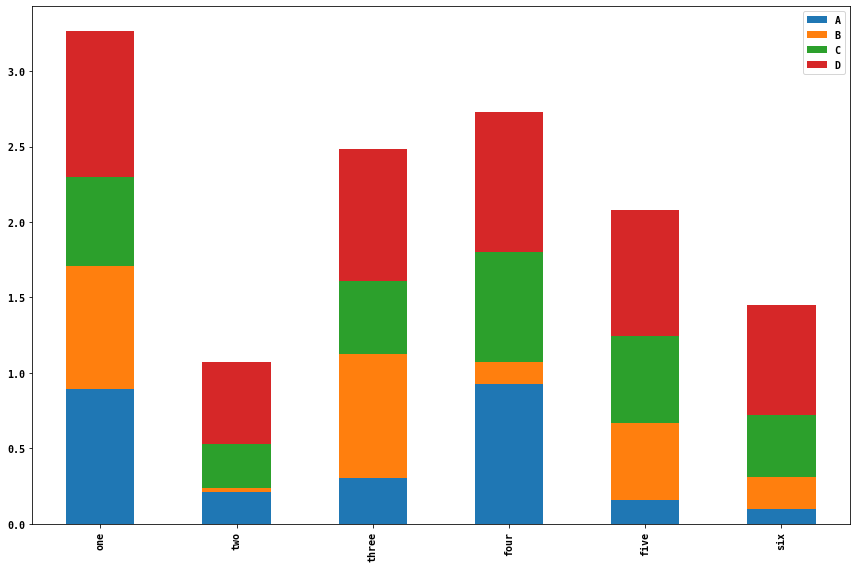

In [202]:
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar(figsize=(12,8), stacked=True)

plt.legend(loc='best')
plt.tight_layout()

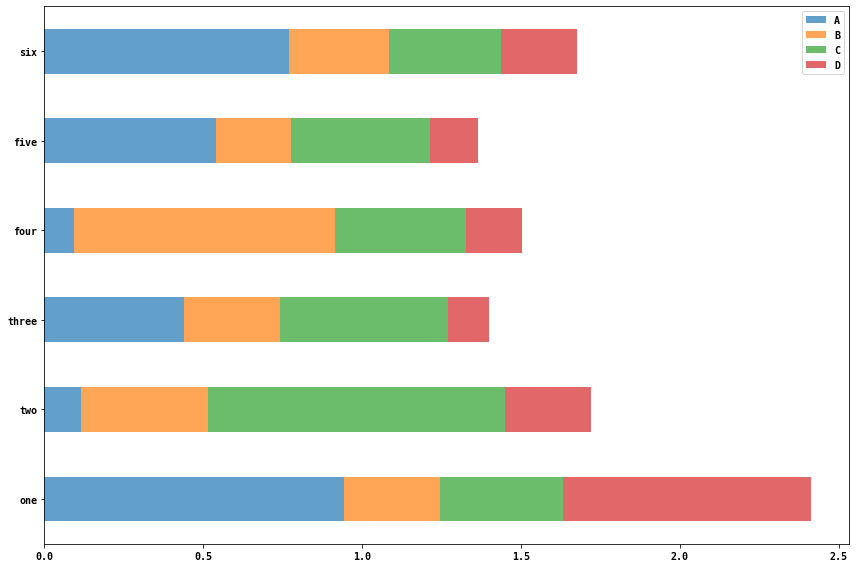

In [203]:
df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.barh(figsize=(12,8), stacked=True, alpha=0.7)

plt.legend(loc='best')
plt.tight_layout()

In [214]:
tips = pd.read_csv('tips.csv')

In [215]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [224]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [225]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [230]:
party_counts = party_counts[[2,3,4]]

In [231]:
party_counts

size,2,3,4
day,,,
Fri,16,1,1
Sat,53,18,13
Sun,39,15,18
Thur,48,4,5


In [239]:
party_pct = party_counts.div(party_counts.sum(1), axis=0)

In [240]:
party_pct

size,2,3,4
day,,,
Fri,0.888889,0.055556,0.055556
Sat,0.630952,0.214286,0.154762
Sun,0.541667,0.208333,0.250000
Thur,0.842105,0.070175,0.087719


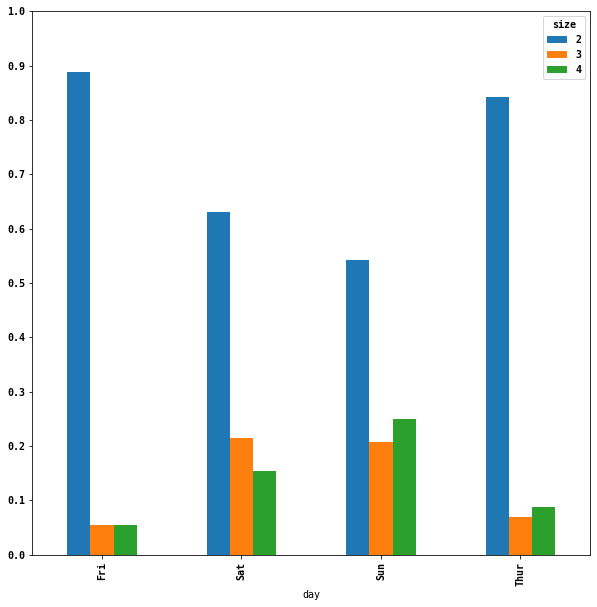

In [257]:
party_pct.plot.bar(yticks=np.arange(0,1.1,0.1))

In [261]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [262]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


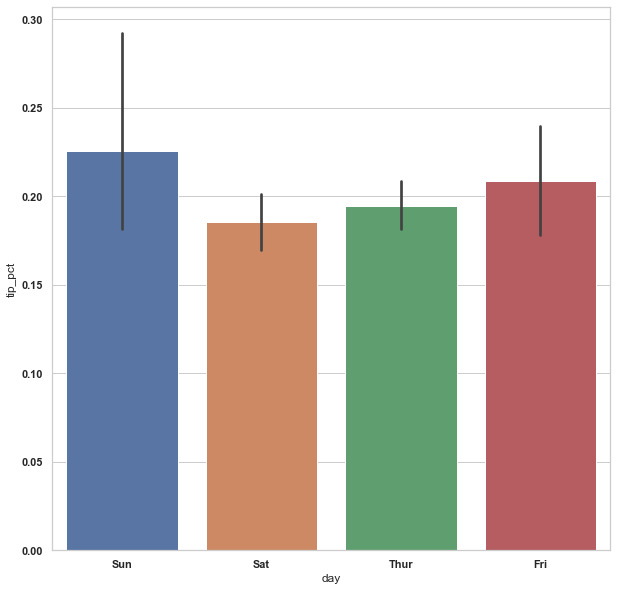

In [279]:
sns.barplot(x='day', y='tip_pct', data=tips)

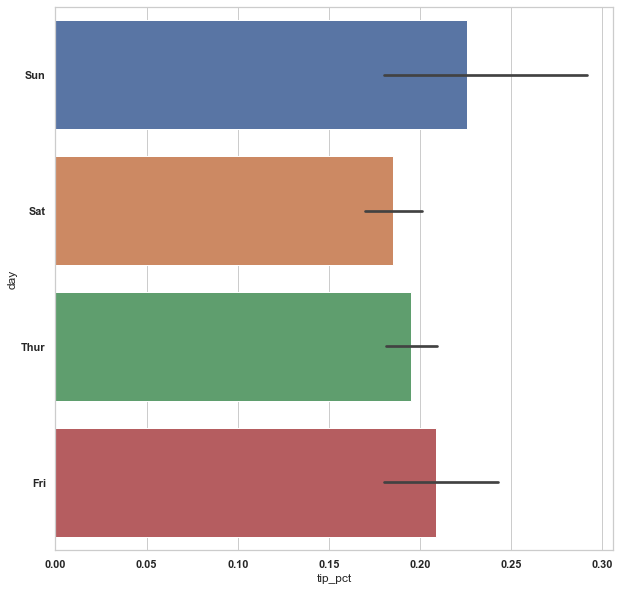

In [280]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

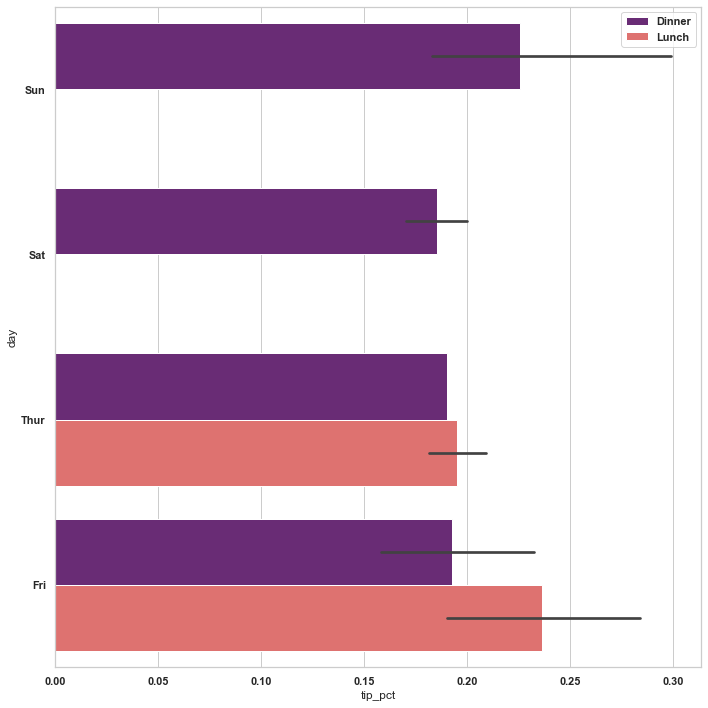

In [281]:
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', palette='magma')

plt.legend(loc='best')
plt.tight_layout()

## Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data
points in each bin is plotted.

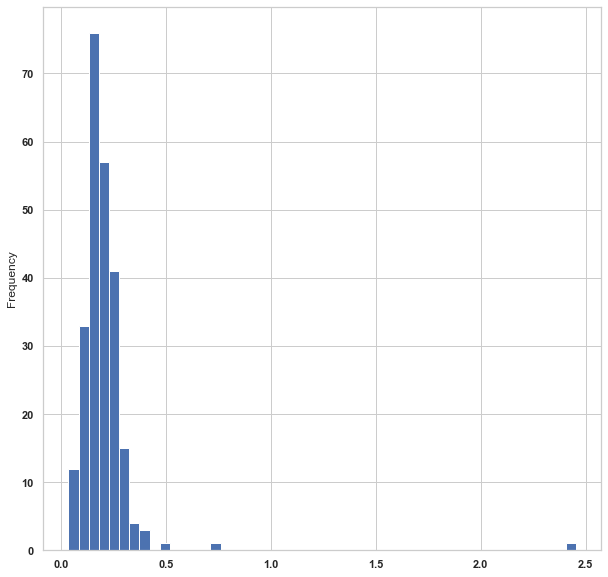

In [291]:
tips['tip_pct'].plot.hist(bins=50)

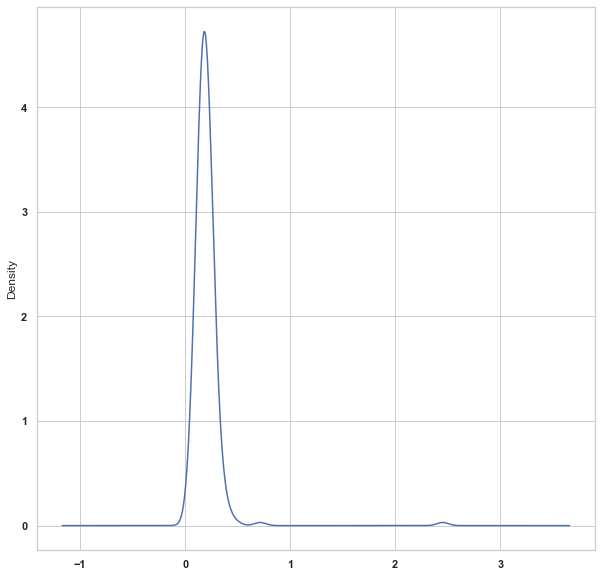

In [299]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its distplot
method, which can plot both a histogram and a continuous density estimate simultaneously. 

In [303]:
comp1 = np.random.normal(0, 1, size=200)

In [311]:
comp2 = np.random.normal(10, 2, size=200)

In [312]:
values = pd.Series(np.concatenate([comp1, comp2]))

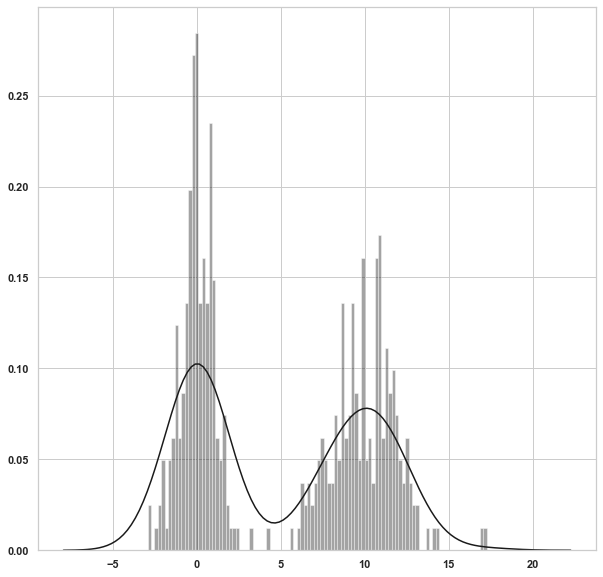

In [313]:
sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between
two one-dimensional data series. 

In [315]:
macro = pd.read_csv('macrodata.csv')

In [317]:
macro.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

In [318]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [319]:
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [324]:
trans_data = np.log(data).diff().dropna()

In [325]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


Text(0.5, 1.0, 'Changes in log m1 vs unemp')

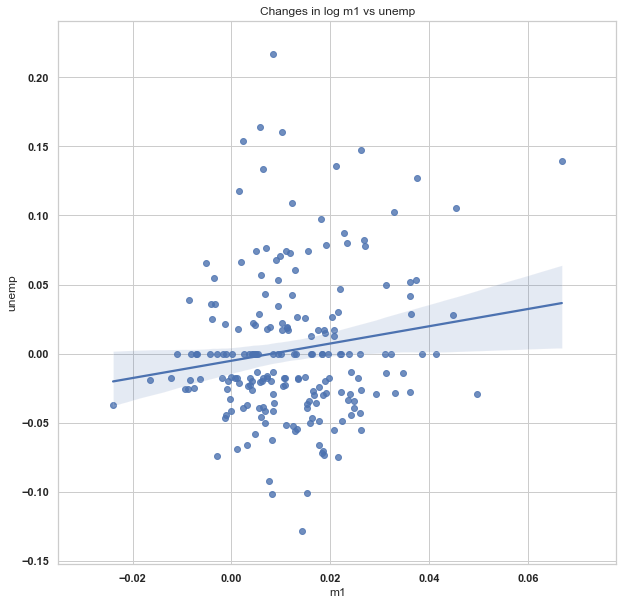

In [331]:
sns.regplot(x='m1', y='unemp', data=trans_data)

plt.title('Changes in log %s vs %s'% ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a *pairs plot* or *scatter plot matrix.*

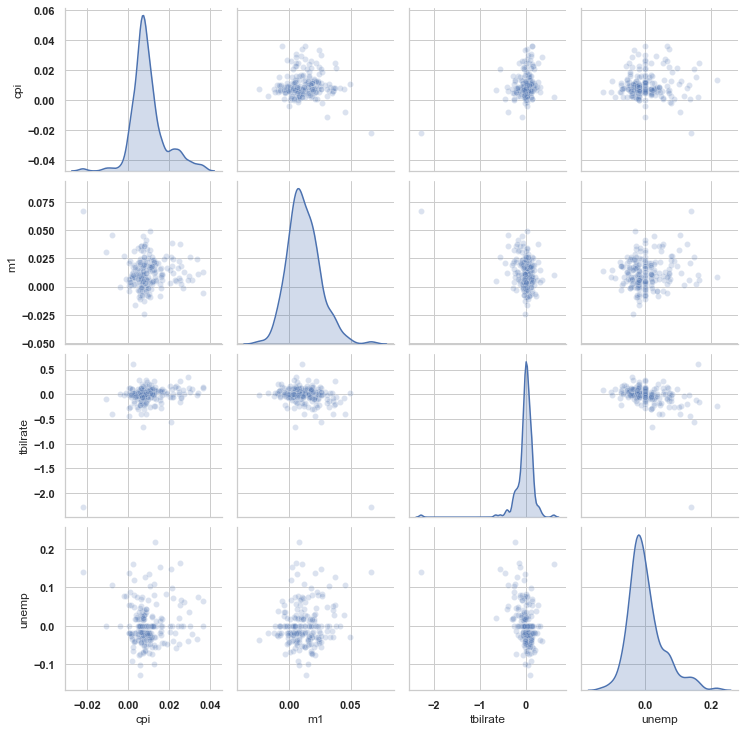

In [334]:
#plot_kws argument enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements. 
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

## Facet Grids and Categorical Data

In [336]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [335]:
tips.columns

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

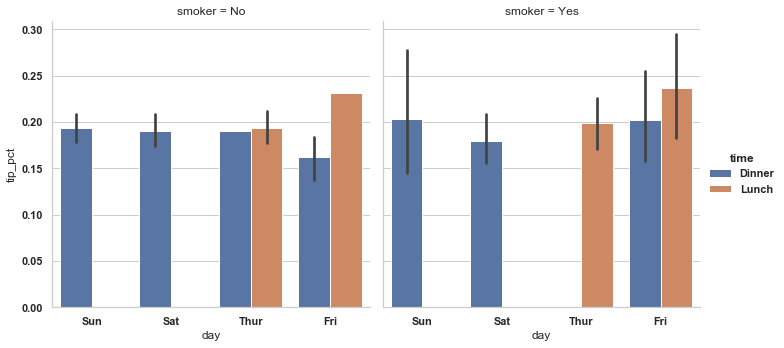

In [340]:
sns.catplot(x='day', y='tip_pct', data=tips[tips['tip_pct'] < 1], kind='bar', col='smoker', hue='time')

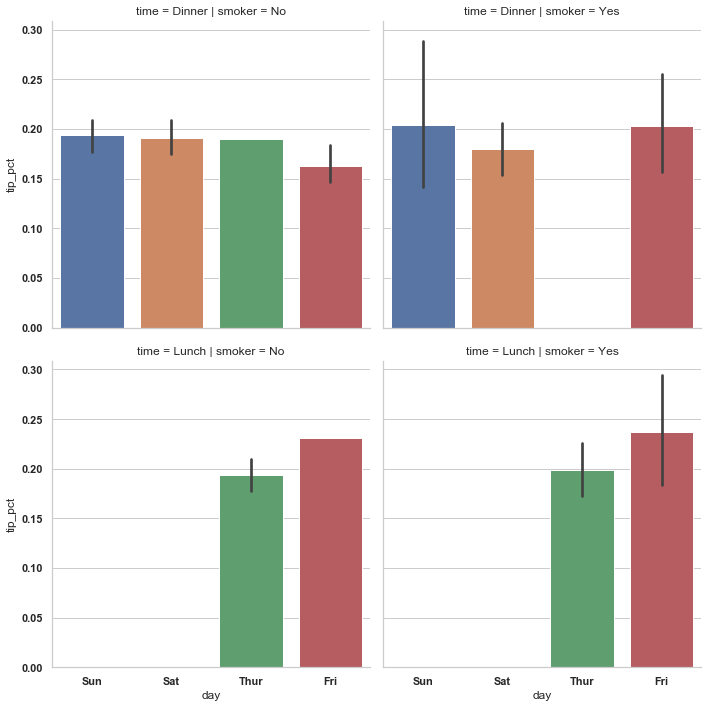

In [342]:
sns.catplot(x='day', y='tip_pct', data=tips[tips['tip_pct'] < 1], kind='bar', row='time', col='smoker')

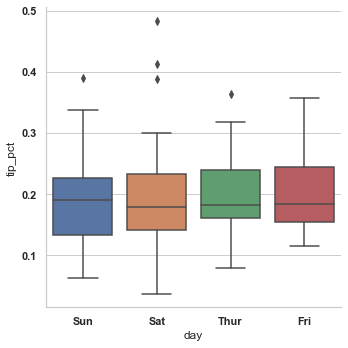

In [344]:
sns.catplot(x='day', y='tip_pct', data=tips[tips['tip_pct']<0.5], kind='box')

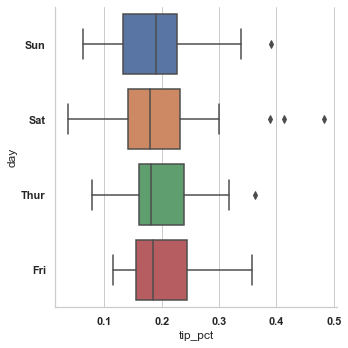

In [345]:
sns.catplot(x='tip_pct', y='day', data=tips[tips['tip_pct']<0.5], kind='box')

# 9.3 Other Python Visualization Tools

Tools like **Bokeh** and **Plotly**, it’s now possible to specify dynamic, interactive graphics in Python that are
destined for a web browser.

For creating static graphics for print or web, It is recommended defaulting to matplotlib and add-on libraries like pandas and seaborn.
